In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from rapidfuzz import process, fuzz
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df_balance_tri = pd.read_csv(r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\balance_tri.csv")

In [5]:
df_balance_tri

,Unnamed: 0,CNPJ_CIA,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Não-Correntes a Venda,...,Outros Ativos Circulantes,Outros Ativos Não Circulantes,Tributos Correntes a Recuperar,Tributos a Recuperar,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos
0,60,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2014-03-31,14079561.00,80960494.00,28728975.00,95040055.00,0.00,...,8930237.00,28035298.00,359234.00,359234.00,0.15,0.85,0.20,0.00,0.00,0.55
1,61,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2014-06-30,12964027.00,81092262.00,28739569.00,94056289.00,0.00,...,8183907.00,26892989.00,464717.00,464717.00,0.14,0.86,0.12,0.00,0.00,0.56
2,62,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2014-09-30,13937561.00,82451744.00,31064414.00,96389305.00,0.00,...,8704462.00,29213200.00,571509.00,571509.00,0.14,0.86,0.15,0.00,0.00,0.53
3,63,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2015-03-31,14878373.00,86770277.00,37008550.00,101648650.00,0.00,...,11183242.00,35174427.00,213541.00,213541.00,0.15,0.85,0.09,0.00,0.00,0.49
4,64,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2015-06-30,15206942.00,84760831.00,36848975.00,99967773.00,0.00,...,10636086.00,35023686.00,253966.00,253966.00,0.15,0.85,0.07,0.00,0.00,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18433,19689,97.837.181/0001-47,DURATEX S.A.,21091,2015-06-30,2245845.00,5539752.00,365687.00,7785597.00,0.00,...,9689.00,158068.00,58433.00,58433.00,0.29,0.71,0.27,0.30,0.11,0.23
18434,19690,97.837.181/0001-47,DURATEX S.A.,21091,2015-09-30,2417760.00,5766329.00,457605.00,8184089.00,0.00,...,7951.00,152052.00,76363.00,76363.00,0.30,0.70,0.29,0.28,0.11,0.24
18435,19691,97.837.181/0001-47,DURATEX S.A.,21091,2016-03-31,2060509.00,5665565.00,397784.00,7726074.00,0.00,...,8509.00,155995.00,77984.00,77984.00,0.27,0.73,0.24,0.33,0.10,0.26
18436,19692,97.837.181/0001-47,DURATEX S.A.,21091,2016-06-30,2207580.00,5467732.00,392393.00,7675312.00,0.00,...,8679.00,154641.00,81255.00,81255.00,0.29,0.71,0.30,0.32,0.10,0.25


In [6]:
df_balance_tri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18438 entries, 0 to 18437
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18438 non-null  int64  
 1   CNPJ_CIA                           18438 non-null  object 
 2   DENOM_CIA                          18438 non-null  object 
 3   CD_CVM                             18438 non-null  int64  
 4   DT_FIM_EXERC                       18438 non-null  object 
 5   Ativo Circulante                   18438 non-null  float64
 6   Ativo Não Circulante               18438 non-null  float64
 7   Ativo Realizável a Longo Prazo     18438 non-null  float64
 8   Ativo Total                        18438 non-null  float64
 9   Ativos Não-Correntes a Venda       18438 non-null  float64
 10  Caixa e Equivalentes de Caixa      18438 non-null  float64
 11  Clientes                           18438 non-null  flo

In [7]:
df_balance_tri.columns

Index(['Unnamed: 0', 'CNPJ_CIA', 'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC',
       'Ativo Circulante', 'Ativo Não Circulante',
       'Ativo Realizável a Longo Prazo', 'Ativo Total',
       'Ativos Não-Correntes a Venda', 'Caixa e Equivalentes de Caixa',
       'Clientes', 'Contas a Receber', 'Estoques', 'Imobilizado', 'Intangível',
       'Investimentos', 'Outras Contas a Receber', 'Outros',
       'Outros Ativos Circulantes', 'Outros Ativos Não Circulantes',
       'Tributos Correntes a Recuperar', 'Tributos a Recuperar',
       'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos'],
      dtype='object')

In [8]:
df_balance_tri['Ativo Total'].describe()

count        18438.00
mean      20504203.59
std      213569484.10
min              0.00
25%         239504.75
50%        1391047.00
75%        4859374.25
max     7754936720.00
Name: Ativo Total, dtype: float64

In [9]:
# Calcular o primeiro quartil (25%)
q1 = df_balance_tri['Ativo Total'].quantile(0.25)

# Exibir o primeiro quartil
print(f"O primeiro quartil (25%) do 'Ativo Total' é: {q1}")

O primeiro quartil (25%) do 'Ativo Total' é: 239504.75


In [10]:
# Definir o valor mínimo com base no primeiro quartil
valor_minimo_aceitavel = q1

# Filtrar as empresas com 'Ativo Total' abaixo do valor mínimo aceitável
df_balance_filtrado = df_balance_tri[df_balance_tri['Ativo Total'] > valor_minimo_aceitavel]

# Verificar o resultado
print(df_balance_filtrado['Ativo Total'].describe())

count        13828.00
mean      27317085.81
std      246238789.81
min         239570.00
25%        1008666.25
50%        2489828.00
75%        7902637.50
max     7754936720.00
Name: Ativo Total, dtype: float64


In [13]:
df_balance_filtrado.info
pasta_salvar = r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\balance_filtrado.csv"

# Salvar o dataframe filtrado
df_balance_filtrado.to_csv(pasta_salvar, index=False)

C:\Users\usuario\AppData\Local\Temp\ipykernel_2628\807521613.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_balance_filtrado["Liquidez Imediata"], shade=True)


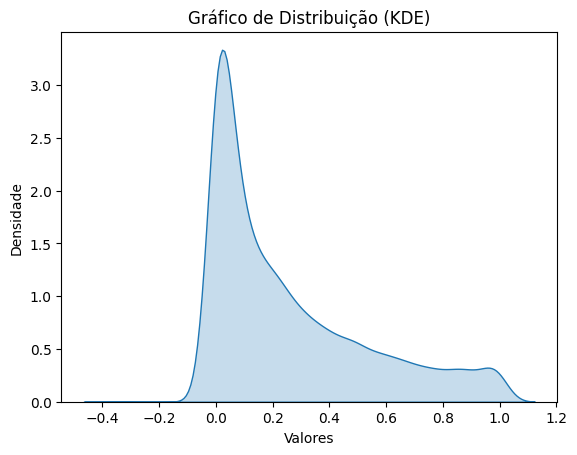

In [12]:
# Criação do gráfico de distribuição
sns.kdeplot(df_balance_filtrado["Liquidez Imediata"], shade=True)

# Adição de títulos e rótulos
plt.title('Gráfico de Distribuição (KDE)')
plt.xlabel('Valores')
plt.ylabel('Densidade')

# Exibição do gráfico
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_5920\3739086688.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_balance_filtrado["Proporção de Investimentos"], shade=True)


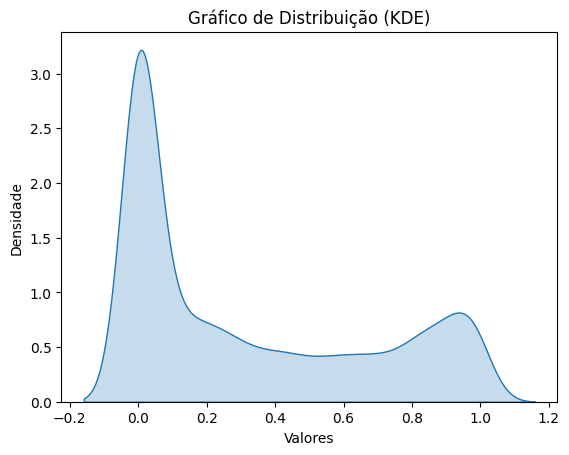

In [11]:
# Criação do gráfico de distribuição
sns.kdeplot(df_balance_filtrado["Proporção de Investimentos"], shade=True)

# Adição de títulos e rótulos
plt.title('Gráfico de Distribuição (KDE)')
plt.xlabel('Valores')
plt.ylabel('Densidade')

# Exibição do gráfico
plt.show()

In [12]:
# # Inicializando o PairGrid
# g = sns.PairGrid(df_balance_filtrado[['Ativo Circulante', 'Ativo Não Circulante', 'Estoques', 'Investimentos']])

# # Mapeando funções de plotagem para o grid
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.scatterplot)  # Usar scatterplot em vez de kdeplot
# g.map_diag(sns.histplot, kde=True)


# # Mostrando o gráfico
# plt.show()

In [13]:
df_balance_filtrado.columns

Index(['Unnamed: 0', 'CNPJ_CIA', 'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC',
       'Ativo Circulante', 'Ativo Não Circulante',
       'Ativo Realizável a Longo Prazo', 'Ativo Total',
       'Ativos Não-Correntes a Venda', 'Caixa e Equivalentes de Caixa',
       'Clientes', 'Contas a Receber', 'Estoques', 'Imobilizado', 'Intangível',
       'Investimentos', 'Outras Contas a Receber', 'Outros',
       'Outros Ativos Circulantes', 'Outros Ativos Não Circulantes',
       'Tributos Correntes a Recuperar', 'Tributos a Recuperar',
       'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos'],
      dtype='object')

In [14]:
df_balance_filtrado["DT_FIM_EXERC"].unique()

array(['2014-03-31', '2014-06-30', '2014-09-30', '2015-03-31',
       '2015-06-30', '2015-09-30', '2016-03-31', '2016-06-30',
       '2016-09-30', '2017-03-31', '2017-06-30', '2017-09-30',
       '2018-03-31', '2018-06-30', '2018-09-30', '2019-03-31',
       '2019-06-30', '2019-09-30', '2020-03-31', '2020-06-30',
       '2020-09-30', '2021-03-31', '2021-06-30', '2021-09-30',
       '2022-03-31', '2022-06-30', '2022-09-30', '2023-03-31',
       '2023-06-30', '2023-09-30', '2020-12-31', '2021-12-31',
       '2022-12-31', '2023-12-31', '2016-12-31', '2017-12-31',
       '2018-12-31', '2019-12-31', '2014-12-31', '2015-12-31',
       '2016-03-30', '2017-05-31', '2017-08-31', '2017-11-30',
       '2018-05-31', '2018-08-31', '2018-11-30', '2019-05-31',
       '2019-08-31', '2019-11-30', '2020-05-31', '2020-08-31',
       '2020-11-30', '2021-05-31', '2021-08-31', '2021-11-30',
       '2022-05-31', '2022-08-31', '2022-11-30', '2023-05-31',
       '2023-08-31', '2023-11-30'], dtype=object)

In [15]:
# Especificar o caminho do arquivo CSV
arquivo_csv = r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\COTAHIST_TODOS_ANOS.csv"

# Ler o arquivo CSV com a codificação apropriada
preco_acoes_todos_os_anos = pd.read_csv(arquivo_csv, encoding='latin1')

# Exibir as primeiras linhas do dataframe lido
print(preco_acoes_todos_os_anos.head())

   tipo_registro  data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
0              1     20140102     2.00          ABCB4            10   
1              1     20140102    96.00         ABCB4F            20   
2              1     20140102    62.00         ABCB4T            30   
3              1     20140102     2.00          ABEV3            10   
4              1     20140102    96.00         ABEV3F            20   

  noma_empresa especificacao_papel  prazo_dias_merc_termo moeda_referencia  \
0   ABC BRASIL          PN  EJS N2                    NaN               R$   
1   ABC BRASIL          PN  EJS N2                    NaN               R$   
2   ABC BRASIL          PN  EJS N2                 361.00               R$   
3    AMBEV S/A                  ON                    NaN               R$   
4    AMBEV S/A                  ON                    NaN               R$   

   preco_abertura  ...  numero_negocios  quantidade_papeis_negociados  \
0           12.31  ...         

In [16]:
# Obter as datas únicas de df_balance_filtrado
datas_balance = pd.to_datetime(df_balance_filtrado["DT_FIM_EXERC"].unique(), format='%Y-%m-%d')

# Converter as datas de dados_acoes_todos_os_anos para datetime
preco_acoes_todos_os_anos['data_pregao'] = pd.to_datetime(preco_acoes_todos_os_anos['data_pregao'], format='%Y%m%d')

# Função para encontrar a data mais próxima
def encontrar_data_mais_proxima(data, datas):
    datas = pd.Series(datas)
    datas_diferenca = (datas - data).abs()
    return datas.iloc[datas_diferenca.argmin()]

# Filtrar datas em dados_acoes_todos_os_anos com base em datas_balance
datas_filtradas = []
for data in datas_balance:
    if data in preco_acoes_todos_os_anos['data_pregao'].values:
        datas_filtradas.append(data)
    else:
        data_proxima = encontrar_data_mais_proxima(data, preco_acoes_todos_os_anos['data_pregao'])
        datas_filtradas.append(data_proxima)

# Filtrar dados_acoes_todos_os_anos
preco_acoes_filtrado = preco_acoes_todos_os_anos[preco_acoes_todos_os_anos['data_pregao'].isin(datas_filtradas)]

# Exibir as primeiras linhas do dataframe filtrado
print(preco_acoes_filtrado.head())

       tipo_registro data_pregao  cod_bdi cod_negociacao  tipo_mercado  \
90786              1  2014-03-31    10.00         ABCB10            10   
90787              1  2014-03-31    96.00        ABCB10F            20   
90788              1  2014-03-31     2.00          ABCB4            10   
90789              1  2014-03-31    96.00         ABCB4F            20   
90790              1  2014-03-31    12.00         ABCP11            10   

       noma_empresa especificacao_papel  prazo_dias_merc_termo  \
90786    ABC BRASIL          PN  REC N2                    NaN   
90787    ABC BRASIL          PN  REC N2                    NaN   
90788    ABC BRASIL          PN      N2                    NaN   
90789    ABC BRASIL          PN      N2                    NaN   
90790  FII ABC IMOB                  CI                    NaN   

      moeda_referencia  preco_abertura  ...  numero_negocios  \
90786               R$           11.80  ...             3.00   
90787               R$        

In [17]:
pd.DataFrame(preco_acoes_filtrado)

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
90786,1,2014-03-31,10.00,ABCB10,10,ABC BRASIL,PN REC N2,NaN,R$,11.80,...,3.00,10500.00,124188.00,0.00,0.00,99991231.00,1.00,0.00,BRABCBR05PR0,120.00
90787,1,2014-03-31,96.00,ABCB10F,20,ABC BRASIL,PN REC N2,NaN,R$,11.80,...,4.00,150.00,1857.80,0.00,0.00,99991231.00,1.00,0.00,BRABCBR05PR0,120.00
90788,1,2014-03-31,2.00,ABCB4,10,ABC BRASIL,PN N2,NaN,R$,12.10,...,1368.00,442900.00,5557024.00,0.00,0.00,99991231.00,1.00,0.00,BRABCBACNPR4,121.00
90789,1,2014-03-31,96.00,ABCB4F,20,ABC BRASIL,PN N2,NaN,R$,12.00,...,14.00,250.00,3140.00,0.00,0.00,99991231.00,1.00,0.00,BRABCBACNPR4,121.00
90790,1,2014-03-31,12.00,ABCP11,10,FII ABC IMOB,CI,NaN,R$,9.90,...,4.00,890.00,8850.60,0.00,0.00,99991231.00,1.00,0.00,BRABCPCTF000,221.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759369,1,2024-01-02,82.00,YDUQN225,80,YDUQE FM,ON NM,0.00,R$,1.75,...,4.00,5300.00,9329.00,22.50,0.00,20240216.00,1.00,0.00,BRYDUQACNOR3,104.00
10759370,1,2024-01-02,82.00,YDUQO170,80,YDUQE,ON NM,0.00,R$,0.20,...,1.00,300.00,60.00,17.00,0.00,20240315.00,1.00,0.00,BRYDUQACNOR3,104.00
10759371,1,2024-01-02,62.00,ZAMP3T,30,ZAMP S.A.,ON NM,30.00,R$,5.65,...,2.00,75300.00,425837.60,0.00,0.00,99991231.00,1.00,0.00,BRZAMPACNOR5,100.00
10759372,1,2024-01-02,62.00,ZAMP3T,30,ZAMP S.A.,ON NM,85.00,R$,5.71,...,2.00,5000.00,28553.30,0.00,0.00,99991231.00,1.00,0.00,BRZAMPACNOR5,100.00


In [18]:
preco_acoes_filtrado.columns

Index(['tipo_registro', 'data_pregao', 'cod_bdi', 'cod_negociacao',
       'tipo_mercado', 'noma_empresa', 'especificacao_papel',
       'prazo_dias_merc_termo', 'moeda_referencia', 'preco_abertura',
       'preco_maximo', 'preco_minimo', 'preco_medio', 'preco_ultimo_negocio',
       'preco_melhor_oferta_compra', 'preco_melhor_oferta_venda',
       'numero_negocios', 'quantidade_papeis_negociados',
       'volume_total_negociado', 'preco_exercicio',
       'ìndicador_correcao_precos', 'data_vencimento', 'fator_cotacao',
       'preco_exercicio_pontos', 'codigo_isin', 'num_distribuicao_papel'],
      dtype='object')

In [19]:
# Filtrando apenas as colunas desejadas
colunas_desejadas = ['data_pregao', 'cod_negociacao', 'noma_empresa', 'preco_ultimo_negocio']
preco_acoes_filtrado_final3 = preco_acoes_filtrado[colunas_desejadas]

# Filtrando apenas as empresas com cod_negociacao terminando em '3'
preco_acoes_filtrado_final3 = preco_acoes_filtrado_final3[preco_acoes_filtrado_final3['cod_negociacao'].str.endswith('3')]

# Exibindo o DataFrame filtrado
pd.DataFrame(preco_acoes_filtrado_final3)

,data_pregao,cod_negociacao,noma_empresa,preco_ultimo_negocio
90791,2014-03-31,ABEV3,AMBEV S/A,16.95
90799,2014-03-31,AEDU3,ANHANGUERA,14.00
90802,2014-03-31,AELP3,AES ELPA,7.45
90803,2014-03-31,AFLT3,AFLUENTE T,3.00
90805,2014-03-31,AGRO3,BRASILAGRO,8.78
...,...,...,...,...
10759240,2024-01-02,WEGEA393,WEGEE,0.08
10759257,2024-01-02,WEGEM353,WEGEE,0.22
10759261,2024-01-02,WEGEM363,WEGEE,0.34
10759264,2024-01-02,WEGEM393,WEGEE,2.59


In [20]:
# Extrair a coluna cod_negociacao e obter os valores únicos
lista_empresas = preco_acoes_filtrado['cod_negociacao'].unique()

# Converter para uma lista (opcional, dependendo de como você quer usar os dados)
lista_empresas = lista_empresas.tolist()

# Contar o número de empresas únicas
numero_empresas = len(lista_empresas)

# Exibir o número de empresas
print(f"Total de empresas: {numero_empresas}")

# Exibir a lista de empresas
print(lista_empresas)

Total de empresas: 121011
['ABCB10', 'ABCB10F', 'ABCB4', 'ABCB4F', 'ABCP11', 'ABEV3', 'ABEV3F', 'ABEV3T', 'ABEVD17', 'ABEVE47', 'ABRE11', 'ABRE11F', 'AEDU3', 'AEDU3F', 'AEFI11', 'AELP3', 'AFLT3', 'AGCX11', 'AGRO3', 'ALLL3', 'ALLL3F', 'ALLLD76', 'ALLLD78', 'ALMI11B', 'ALPA3', 'ALPA3F', 'ALPA4', 'ALPA4F', 'ALPA4T', 'ALSC3', 'ALSC3F', 'ALUP11', 'ALUP11F', 'AMAR3', 'AMAR3F', 'ANIM3', 'ANIM3F', 'ARTR3', 'ARTR3F', 'ARTR3T', 'ARZZ3', 'ARZZ3F', 'AUTM3', 'AUTM3F', 'AZEV4', 'AZEV4F', 'BAHI3', 'BALM4', 'BALM4F', 'BAUH4', 'BAZA3', 'BAZA3F', 'BBAS3', 'BBAS3F', 'BBAS3T', 'BBASD19', 'BBASD20', 'BBASD21', 'BBASD22', 'BBASD23', 'BBASD24', 'BBASD25', 'BBASD26', 'BBASD50', 'BBASE19', 'BBASE21', 'BBASE22', 'BBASE23', 'BBASE24', 'BBASE25', 'BBASE26', 'BBASE53', 'BBASF22', 'BBASF24', 'BBASF26', 'BBASF27', 'BBASG25', 'BBASP19', 'BBASP20', 'BBASP21', 'BBASP22', 'BBASP23', 'BBASP24', 'BBASP50', 'BBASQ19', 'BBASQ21', 'BBASQ22', 'BBASQ49', 'BBASQ50', 'BBASQ53', 'BBASQ72', 'BBASR21', 'BBASR22', 'BBASR23', 'BBASS2

In [21]:
# Extrair a coluna cod_negociacao e obter os valores únicos
lista_empresas = preco_acoes_filtrado['cod_negociacao'].unique()

# Filtrar a lista para remover os códigos que contêm a letra 'F'
lista_empresas_filtrada = [codigo for codigo in lista_empresas if 'F' not in codigo]

# Filtrar a lista para manter apenas os códigos que terminam com '3'
lista_empresas_final_3 = [codigo for codigo in lista_empresas_filtrada if codigo.endswith('3')]

# Contar o número de empresas únicas na lista filtrada
numero_empresas_final_3 = len(lista_empresas_final_3)

# Exibir o número de empresas na lista filtrada
print(f"Total de empresas (sem códigos com 'F' e com final '3'): {numero_empresas_final_3}")

# Exibir a lista de empresas filtrada
print(lista_empresas_final_3)



Total de empresas (sem códigos com 'F' e com final '3'): 6657
['ABEV3', 'AEDU3', 'AELP3', 'AGRO3', 'ALLL3', 'ALPA3', 'ALSC3', 'AMAR3', 'ANIM3', 'ARTR3', 'ARZZ3', 'AUTM3', 'BAHI3', 'BAZA3', 'BBAS3', 'BBASD23', 'BBASE23', 'BBASE53', 'BBASP23', 'BBASQ53', 'BBASR23', 'BBDC3', 'BBDCD33', 'BBDCE33', 'BBDCP33', 'BBDCQ33', 'BBRK3', 'BBSE3', 'BEES3', 'BEMA3', 'BHGR3', 'BIOM3', 'BISA3', 'BPHA3', 'BRAP3', 'BRIN3', 'BRIV3', 'BRKM3', 'BRML3', 'BRMLK23', 'BRPR3', 'BRSR3', 'BRSRR13', 'BSEV3', 'BTOW3', 'CARD3', 'CCHI3', 'CCPR3', 'CCRO3', 'CCXC3', 'CEDO3', 'CELP3', 'CESP3', 'CGRA3', 'CIEL3', 'CIELR63', 'CMIG3', 'COCE3', 'CPLE3', 'CPRE3', 'CRDE3', 'CREM3', 'CRIV3', 'CRUZ3', 'CSAN3', 'CSMG3', 'CSNA3', 'CTAX3', 'CTIP3', 'CTSA3', 'CVCB3', 'CYRE3', 'CYRED13', 'CYRED43', 'CYRED63', 'CYREE13', 'CYREE43', 'CYREP13', 'CYREP43', 'CYREP63', 'CYREQ13', 'CYREQ43', 'CZLT33', 'DAGB33', 'DASA3', 'DIRR3', 'DTCY3', 'DTEX3', 'EBTP3', 'ECOR3', 'ECPR3', 'EEEL3', 'ELET3', 'ELPL3', 'EMBR3', 'ENBR3', 'ENEV3', 'EQTL3', 'ESTC3'

In [22]:
# Especificar o caminho do arquivo Excel
arquivo_excel = r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\cnpj_acoes_b3.xlsx"

# Ler o arquivo Excel
df_cnpj_acoes_b3 = pd.read_excel(arquivo_excel)

# Exibir as primeiras linhas do dataframe
print(df_cnpj_acoes_b3.head())




  CNPJ das empresas listadas na B3          Unnamed: 1  \
0                           Ticker  Denominação social   
1                            AALR3              Alliar   
2                            ABCB4          Abc Brasil   
3                            ABEV3           Ambev S/A   
4                            AERI3               Aeris   

                                          Unnamed: 2      Unnamed: 3  
0                                     Nome de pregão            CNPJ  
1                 CENTRO DE IMAGEM DIAGNOSTICOS S.A.  42771949000135  
2                                BCO ABC BRASIL S.A.  28195667000106  
3                                         AMBEV S.A.  07526557000100  
4  AERIS IND. E COM. DE EQUIP. GERACAO DE ENERGIA...  12528708000107  


In [23]:
# Especificar o caminho do arquivo CSV de saída
arquivo_cnpj_acoes_csv = r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\cnpj_acoes_b3.csv"

# Salvar o DataFrame como um arquivo CSV
df_cnpj_acoes_b3.to_csv(arquivo_cnpj_acoes_csv, index=False, encoding='utf-8')

# Ler o arquivo Excel, especificando a segunda linha como cabeçalho (index 1)
df_cnpj_acoes_b3 = pd.read_excel(arquivo_excel, header=1)


# Exibir as primeiras linhas do DataFrame lido do CSV
pd.DataFrame(df_cnpj_acoes_b3)


,Ticker,Denominação social,Nome de pregão,CNPJ
0,AALR3,Alliar,CENTRO DE IMAGEM DIAGNOSTICOS S.A.,42771949000135
1,ABCB4,Abc Brasil,BCO ABC BRASIL S.A.,28195667000106
2,ABEV3,Ambev S/A,AMBEV S.A.,7526557000100
3,AERI3,Aeris,AERIS IND. E COM. DE EQUIP. GERACAO DE ENERGIA...,12528708000107
4,AESB3,AES Brasil,AES BRASIL ENERGIA S.A.,37663076000107
...,...,...,...,...
553,WLMM3,Wlm Ind Com,WLM PART. E COMÉRCIO DE MÁQUINAS E VEÍCULOS S.A.,33228024000151
554,WLMM4,Wlm Ind Com,WLM PART. E COMÉRCIO DE MÁQUINAS E VEÍCULOS S.A.,33228024000151
555,YBRA3B,Ybyra S/A,YBRA3 TENNOLOGIA LTDA,2217319000107
556,YDUQ3,Yduqs Part,YDUQS PARTICIPACOES S.A.,8807432000110


In [24]:
# Criar o dicionário de mapeamento do Ticker para o CNPJ
ticker_to_cnpj = dict(zip(df_cnpj_acoes_b3['Ticker'], df_cnpj_acoes_b3['CNPJ']))

# Adicionar a coluna CNPJ ao DataFrame preco_acoes_filtrado_final3
preco_acoes_filtrado_final3['CNPJ'] = preco_acoes_filtrado_final3['cod_negociacao'].map(ticker_to_cnpj)

# Reorganizar as colunas para colocar a coluna CNPJ antes de cod_negociacao
colunas_ordenadas = ['data_pregao', 'CNPJ', 'cod_negociacao', 'noma_empresa', 'preco_ultimo_negocio']
preco_acoes_filtrado_final3 = preco_acoes_filtrado_final3[colunas_ordenadas]

# Exibir as primeiras linhas do DataFrame atualizado

pd.DataFrame(preco_acoes_filtrado_final3)

,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio
90791,2014-03-31,7526557000100.00,ABEV3,AMBEV S/A,16.95
90799,2014-03-31,NaN,AEDU3,ANHANGUERA,14.00
90802,2014-03-31,NaN,AELP3,AES ELPA,7.45
90803,2014-03-31,10338320000100.00,AFLT3,AFLUENTE T,3.00
90805,2014-03-31,7628528000159.00,AGRO3,BRASILAGRO,8.78
...,...,...,...,...,...
10759240,2024-01-02,NaN,WEGEA393,WEGEE,0.08
10759257,2024-01-02,NaN,WEGEM353,WEGEE,0.22
10759261,2024-01-02,NaN,WEGEM363,WEGEE,0.34
10759264,2024-01-02,NaN,WEGEM393,WEGEE,2.59


In [25]:
# Criar o dicionário de mapeamento do Ticker para o CNPJ
ticker_to_cnpj = dict(zip(df_cnpj_acoes_b3['Ticker'], df_cnpj_acoes_b3['CNPJ']))

# Adicionar a coluna CNPJ ao DataFrame preco_acoes_filtrado_final3
preco_acoes_filtrado_final3['CNPJ'] = preco_acoes_filtrado_final3['cod_negociacao'].map(ticker_to_cnpj)

# Reorganizar as colunas para colocar a coluna CNPJ antes de cod_negociacao
colunas_ordenadas = ['data_pregao', 'CNPJ', 'cod_negociacao', 'noma_empresa', 'preco_ultimo_negocio']
preco_acoes_filtrado_final3 = preco_acoes_filtrado_final3[colunas_ordenadas]

# Excluir todas as linhas que contêm valores NaN na coluna CNPJ
preco_acoes_filtrado_final3 = preco_acoes_filtrado_final3.dropna(subset=['CNPJ'])

In [107]:
pd.DataFrame(preco_acoes_filtrado_final3).to_csv(r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\cotacao_trimestral.csv", index=False, encoding='utf-8')

In [108]:
pd.DataFrame(preco_acoes_filtrado_final3)


,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,noma_empresa_padronizado
90791,2014-03-31,7526557000100.00,ABEV3,AMBEV S/A,16.95,ambevsa
90803,2014-03-31,10338320000100.00,AFLT3,AFLUENTE T,3.00,afluentet
90805,2014-03-31,7628528000159.00,AGRO3,BRASILAGRO,8.78,brasilagro
90811,2014-03-31,61079117000105.00,ALPA3,ALPARGATAS,11.85,alpargatas
90820,2014-03-31,61189288000189.00,AMAR3,LOJAS MARISA,15.40,lojasmari
...,...,...,...,...,...,...
10580377,2024-01-02,8613550000198.00,NEXP3,NEXPE,5.01,nexpe
10580378,2024-01-02,4032433000180.00,ATMP3,ATMASA,4.55,atma
10581236,2024-01-02,7857850000150.00,GPIV33,GP INVEST,2.75,gpinvest
10581237,2024-01-02,38307135000177.00,G2DI33,G2D INVEST,2.04,g2dinvest


In [27]:
# Obter a lista de códigos únicos em cod_negociacao
lista_codigos = preco_acoes_filtrado_final3['cod_negociacao'].unique()

# Contar o número de empresas únicas
numero_empresas = len(lista_codigos)

# Exibir o número de empresas e a lista de códigos
print(f"Total de empresas: {numero_empresas}")
print(lista_codigos)

Total de empresas: 325
['ABEV3' 'AFLT3' 'AGRO3' 'ALPA3' 'AMAR3' 'ANIM3' 'ARZZ3' 'BAHI3' 'BAZA3'
 'BBAS3' 'BBDC3' 'BBSE3' 'BEEF3' 'BEES3' 'BIOM3' 'BRAP3' 'BRFS3' 'BRIV3'
 'BRKM3' 'BRPR3' 'BRSR3' 'CCRO3' 'CEDO3' 'CGRA3' 'CIEL3' 'CMIG3' 'COCE3'
 'CPFE3' 'CPLE3' 'CRDE3' 'CRIV3' 'CSAN3' 'CSMG3' 'CSNA3' 'CTSA3' 'CVCB3'
 'CYRE3' 'DASA3' 'DIRR3' 'DTCY3' 'ECOR3' 'EEEL3' 'ELET3' 'EMBR3' 'ENBR3'
 'ENEV3' 'EQTL3' 'ETER3' 'EVEN3' 'EZTC3' 'FHER3' 'FLRY3' 'FRAS3' 'FRIO3'
 'GFSA3' 'GGBR3' 'GOAU3' 'GPIV33' 'GRND3' 'GSHP3' 'GUAR3' 'HBOR3' 'HYPE3'
 'IGBR3' 'INEP3' 'ITSA3' 'ITUB3' 'JBSS3' 'JFEN3' 'JHSF3' 'JSLG3' 'KEPL3'
 'LEVE3' 'LIGT3' 'LOGN3' 'LPSB3' 'LREN3' 'LUPA3' 'MDIA3' 'MGLU3' 'MILS3'
 'MNDL3' 'MNPR3' 'MRFG3' 'MRVE3' 'MULT3' 'MYPK3' 'NUTR3' 'ODPV3' 'OIBR3'
 'OSXB3' 'PDGR3' 'PETR3' 'PFRM3' 'PLAS3' 'PMAM3' 'PNVL3' 'POMO3' 'POSI3'
 'PSSA3' 'PTBL3' 'QUAL3' 'RADL3' 'RANI3' 'RAPT3' 'RDNI3' 'REDE3' 'RENT3'
 'ROMI3' 'RPMG3' 'RSID3' 'SANB3' 'SBSP3' 'SCAR3' 'SEER3' 'SGPS3' 'SHOW3'
 'SLCE3' 'SMTO3' 'TCNO3' 'T

In [28]:
pd.DataFrame(df_balance_filtrado)

,Unnamed: 0,CNPJ_CIA,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,Ativos Não-Correntes a Venda,...,Outros Ativos Circulantes,Outros Ativos Não Circulantes,Tributos Correntes a Recuperar,Tributos a Recuperar,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos
0,60,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2014-03-31,14079561.00,80960494.00,28728975.00,95040055.00,0.00,...,8930237.00,28035298.00,359234.00,359234.00,0.15,0.85,0.20,0.00,0.00,0.55
1,61,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2014-06-30,12964027.00,81092262.00,28739569.00,94056289.00,0.00,...,8183907.00,26892989.00,464717.00,464717.00,0.14,0.86,0.12,0.00,0.00,0.56
2,62,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2014-09-30,13937561.00,82451744.00,31064414.00,96389305.00,0.00,...,8704462.00,29213200.00,571509.00,571509.00,0.14,0.86,0.15,0.00,0.00,0.53
3,63,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2015-03-31,14878373.00,86770277.00,37008550.00,101648650.00,0.00,...,11183242.00,35174427.00,213541.00,213541.00,0.15,0.85,0.09,0.00,0.00,0.49
4,64,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,2015-06-30,15206942.00,84760831.00,36848975.00,99967773.00,0.00,...,10636086.00,35023686.00,253966.00,253966.00,0.15,0.85,0.07,0.00,0.00,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18433,19689,97.837.181/0001-47,DURATEX S.A.,21091,2015-06-30,2245845.00,5539752.00,365687.00,7785597.00,0.00,...,9689.00,158068.00,58433.00,58433.00,0.29,0.71,0.27,0.30,0.11,0.23
18434,19690,97.837.181/0001-47,DURATEX S.A.,21091,2015-09-30,2417760.00,5766329.00,457605.00,8184089.00,0.00,...,7951.00,152052.00,76363.00,76363.00,0.30,0.70,0.29,0.28,0.11,0.24
18435,19691,97.837.181/0001-47,DURATEX S.A.,21091,2016-03-31,2060509.00,5665565.00,397784.00,7726074.00,0.00,...,8509.00,155995.00,77984.00,77984.00,0.27,0.73,0.24,0.33,0.10,0.26
18436,19692,97.837.181/0001-47,DURATEX S.A.,21091,2016-06-30,2207580.00,5467732.00,392393.00,7675312.00,0.00,...,8679.00,154641.00,81255.00,81255.00,0.29,0.71,0.30,0.32,0.10,0.25


In [29]:
# Função para padronizar os nomes das empresas
def padronizar_nome(nome):
    if pd.isna(nome):
        return ''
    # Remover sufixos comuns
    sufixos_comuns = ['s.a.', 'ltda', 'sa', 'cia', 'corporation', 'inc', 'limited', 'grupo', 'holding', 'participações', 'energia']
    nome = nome.lower().strip()
    for sufixo in sufixos_comuns:
        nome = nome.replace(sufixo, '')
    return ''.join(e for e in nome if e.isalnum())

# Padronizar os nomes das empresas nos dois DataFrames
preco_acoes_filtrado_final3['noma_empresa_padronizado'] = preco_acoes_filtrado_final3['noma_empresa'].apply(padronizar_nome)
df_balance_filtrado['DENOM_CIA_padronizado'] = df_balance_filtrado['DENOM_CIA'].apply(padronizar_nome)

# Criar uma lista de nomes de empresas padronizados e códigos de negociação do DataFrame preco_acoes_filtrado_final3
nomes_empresas_padronizados = preco_acoes_filtrado_final3['noma_empresa_padronizado'].tolist()
codigos_negociacao = preco_acoes_filtrado_final3['cod_negociacao'].tolist()

# Função para encontrar a correspondência mais próxima
def encontrar_correspondencia_padronizada(nome):
    correspondencia, score, _ = process.extractOne(nome, nomes_empresas_padronizados, scorer=fuzz.ratio)
    return correspondencia if score >= 70 else None

# Aplicar a função de correspondência ao DataFrame df_balance_filtrado
df_balance_filtrado['empresa_correspondente_padronizado'] = df_balance_filtrado['DENOM_CIA_padronizado'].apply(encontrar_correspondencia_padronizada)

# Criar um dicionário de mapeamento para os códigos de negociação usando as correspondências encontradas
nome_to_cod_padronizado = dict(zip(preco_acoes_filtrado_final3['noma_empresa_padronizado'], preco_acoes_filtrado_final3['cod_negociacao']))

# Adicionar a coluna cod_negociacao ao DataFrame df_balance_filtrado usando as correspondências encontradas
df_balance_filtrado['cod_negociacao'] = df_balance_filtrado['empresa_correspondente_padronizado'].map(nome_to_cod_padronizado)

# Filtrar apenas as linhas onde a correspondência foi encontrada
encontradas = df_balance_filtrado.dropna(subset=['cod_negociacao'])

# Reorganizar as colunas para colocar a coluna cod_negociacao ao lado de CNPJ_CIA
cols = list(encontradas.columns)
cnpj_index = cols.index('CNPJ_CIA')
cols.insert(cnpj_index + 1, cols.pop(cols.index('cod_negociacao')))
encontradas = encontradas[cols]

# Criar uma lista com os códigos de negociação encontrados
codigos_encontrados = encontradas['cod_negociacao'].unique()

# Exibir a lista de códigos de negociação encontrados
print("Códigos de negociação encontrados:")
print(codigos_encontrados)

# Exibir o total de empresas encontradas
print(f"Total de empresas encontradas: {len(codigos_encontrados)}")

# Opcional: salvar o DataFrame atualizado em um novo arquivo CSV
# encontradas.to_csv('path_to_updated_encontradas.csv', index=False)

# Identificar correspondências erradas manualmente
correspondencias_erradas = []
for index, row in encontradas.iterrows():
    if row['cod_negociacao'] == 'EGIE3' and 'engie' not in row['DENOM_CIA'].lower():
        correspondencias_erradas.append(row)

print("Correspondências erradas detectadas:")
print(correspondencias_erradas)


C:\Users\usuario\AppData\Local\Temp\ipykernel_5920\3959989439.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balance_filtrado['DENOM_CIA_padronizado'] = df_balance_filtrado['DENOM_CIA'].apply(padronizar_nome)
C:\Users\usuario\AppData\Local\Temp\ipykernel_5920\3959989439.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balance_filtrado['empresa_correspondente_padronizado'] = df_balance_filtrado['DENOM_CIA_padronizado'].apply(encontrar_correspondencia_padronizada)
C:\Users\usuario\AppData\Loca

Códigos de negociação encontrados:
['EGIE3' 'EKTR3' 'GPIV33' 'AMER3' 'ENGI3' 'CIEL3' 'NEOE3' 'GFSA3' 'BRFS3'
 'CSUD3' 'LIGT3' 'LIPR3' 'PSSA3' 'DEXP3' 'GPAR3' 'RENT3' 'RAIL3' 'TIMS3'
 'CPFE3' 'EMBR3' 'VIVT3' 'JALL3' 'CCRO3' 'JBSS3' 'AERI3' 'HYPE3' 'PMAM3'
 'EQTL3' 'RECV3' 'CLSA3' 'BRAP3' 'AESB3' 'ATMP3' 'SQIA3' 'ENEV3' 'UCAS3'
 'BIOM3' 'SEER3' 'LAND3' 'BRPR3' 'SIMH3' 'ABEV3' 'TCSA3' 'DESK3' 'NEXP3'
 'SYNE3' 'GUAR3' 'TRIS3' 'CMIN3' 'BEEF3' 'BMOB3' 'INTB3' 'OSXB3' 'ANIM3'
 'TECN3' 'ELMD3' 'NGRD3' 'PRIO3' 'MULT3' 'AGRO3' 'ENAT3' 'RRRP3' 'DMVF3'
 'RDOR3' 'SBFG3' 'KRSA3' 'ZAMP3' 'CASH3' 'NINJ3' 'MILS3' 'CVCB3' 'SUZB3'
 'AVLL3' 'ENJU3' 'RPAD3' 'DOTZ3' 'BRIT3' 'AGXY3' 'CXSE3' 'GEPA3' 'GMAT3'
 'TRAD3' 'TRPL3' 'AURE3' 'MBLY3' 'NTCO3' 'VIIA3' 'VVEO3' 'CSNA3' 'MOAR3'
 'PORT3' 'VALE3' 'GGBR3' 'VIVA3' 'VBBR3' 'ECOR3' 'BRKM3' 'EPAR3' 'CEAB3'
 'VITT3' 'MGLU3' 'CSAN3' 'VULC3' 'SMTO3' 'JSLG3' 'TOTS3' 'ROMI3' 'ODPV3'
 'WHRL3' 'RDNI3' 'LEVE3' 'IGTI3' 'FLRY3' 'RSID3' 'ALPA3' 'CAMB3' 'MYPK3'
 'ITSA3' 'REDE3

In [30]:
pd.DataFrame(encontradas)

,Unnamed: 0,CNPJ_CIA,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,...,Tributos Correntes a Recuperar,Tributos a Recuperar,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,DENOM_CIA_padronizado,empresa_correspondente_padronizado
30,90,00.070.698/0001-11,EGIE3,CIA ENERGETICA DE BRASILIA,14451,2014-03-31,36770.00,541850.00,4736.00,578620.00,...,8311.00,8311.00,0.06,0.94,0.14,0.02,0.01,0.90,energeticadebrasilia,engiebrasil
31,91,00.070.698/0001-11,EGIE3,CIA ENERGETICA DE BRASILIA,14451,2014-06-30,74621.00,398438.00,4835.00,473059.00,...,8211.00,8211.00,0.16,0.84,0.11,0.01,0.04,0.80,energeticadebrasilia,engiebrasil
32,92,00.070.698/0001-11,EGIE3,CIA ENERGETICA DE BRASILIA,14451,2014-09-30,81484.00,372512.00,4835.00,453996.00,...,8218.00,8218.00,0.18,0.82,0.07,0.01,0.11,0.77,energeticadebrasilia,engiebrasil
33,93,00.070.698/0001-11,EGIE3,CIA ENERGETICA DE BRASILIA,14451,2015-03-31,82346.00,372194.00,4782.00,454540.00,...,9530.00,9530.00,0.18,0.82,0.03,0.01,0.13,0.77,energeticadebrasilia,engiebrasil
34,94,00.070.698/0001-11,EGIE3,CIA ENERGETICA DE BRASILIA,14451,2015-06-30,70536.00,395269.00,12580.00,465805.00,...,2109.00,2109.00,0.15,0.85,0.21,0.01,0.08,0.79,energeticadebrasilia,engiebrasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18433,19689,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2015-06-30,2245845.00,5539752.00,365687.00,7785597.00,...,58433.00,58433.00,0.29,0.71,0.27,0.30,0.11,0.23,duratex,eucatex
18434,19690,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2015-09-30,2417760.00,5766329.00,457605.00,8184089.00,...,76363.00,76363.00,0.30,0.70,0.29,0.28,0.11,0.24,duratex,eucatex
18435,19691,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2016-03-31,2060509.00,5665565.00,397784.00,7726074.00,...,77984.00,77984.00,0.27,0.73,0.24,0.33,0.10,0.26,duratex,eucatex
18436,19692,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2016-06-30,2207580.00,5467732.00,392393.00,7675312.00,...,81255.00,81255.00,0.29,0.71,0.30,0.32,0.10,0.25,duratex,eucatex


In [31]:
# Criar um DataFrame com os códigos de negociação e os nomes das empresas para revisão
codigos_nomes_df = encontradas[['cod_negociacao', 'DENOM_CIA']].drop_duplicates().reset_index(drop=True)

# Exibir o DataFrame
print(codigos_nomes_df)

    cod_negociacao                   DENOM_CIA
0            EGIE3  CIA ENERGETICA DE BRASILIA
1            EKTR3                ELETRON S.A.
2           GPIV33               INVESTCO S.A.
3            AMER3             AMERICANAS S.A.
4            ENGI3               ENERGISA S.A.
..             ...                         ...
152          LREN3           LOJAS RENNER S.A.
153          TASA3           TAURUS ARMAS S.A.
154          LJQQ3      LOJAS QUERO QUERO S.A.
155          DXCO3                  DEXCO S.A.
156          EUCA3                DURATEX S.A.

[157 rows x 2 columns]


In [32]:
print(codigos_nomes_df.to_string(index=False))

cod_negociacao                             DENOM_CIA
         EGIE3            CIA ENERGETICA DE BRASILIA
         EKTR3                          ELETRON S.A.
        GPIV33                         INVESTCO S.A.
         AMER3                       AMERICANAS S.A.
         ENGI3                         ENERGISA S.A.
         CIEL3                            CIELO S.A.
         NEOE3                       NEOENERGIA S.A.
         GFSA3                           GAFISA S.A.
         BRFS3                              BRF S.A.
         CSUD3                      CSU DIGITAL S.A.
         LIGT3                    LIGHT ENERGIA S.A.
         LIPR3                      ELETRORIVER S.A.
         PSSA3                     PORTO SEGURO S.A.
         DEXP3             DEXXOS PARTICIPAÇÕES S.A.
         GPAR3       CEL PARTICIPAÇÕES S.A. - CELPAR
         RENT3                   LOCALIZA FLEET S.A.
         EKTR3                    ELEKTRO REDES S.A.
         RAIL3                             RUM

In [33]:
# Remover linhas incorretas com o código ENGI3
encontradas_corrigido = codigos_nomes_df[~((codigos_nomes_df['cod_negociacao'] == 'ENGI3') & (codigos_nomes_df['DENOM_CIA'] != 'ENGIE BRASIL ENERGIA S.A.'))]
encontradas_corrigido = encontradas_corrigido[~((codigos_nomes_df['cod_negociacao'] == 'EGIE3') & (codigos_nomes_df['DENOM_CIA'] != 'ENGIE BRASIL ENERGIA S.A.'))]

# Exibir o DataFrame atualizado
print(encontradas_corrigido.to_string(index=False))

cod_negociacao                             DENOM_CIA
         EKTR3                          ELETRON S.A.
        GPIV33                         INVESTCO S.A.
         AMER3                       AMERICANAS S.A.
         CIEL3                            CIELO S.A.
         NEOE3                       NEOENERGIA S.A.
         GFSA3                           GAFISA S.A.
         BRFS3                              BRF S.A.
         CSUD3                      CSU DIGITAL S.A.
         LIGT3                    LIGHT ENERGIA S.A.
         LIPR3                      ELETRORIVER S.A.
         PSSA3                     PORTO SEGURO S.A.
         DEXP3             DEXXOS PARTICIPAÇÕES S.A.
         GPAR3       CEL PARTICIPAÇÕES S.A. - CELPAR
         RENT3                   LOCALIZA FLEET S.A.
         EKTR3                    ELEKTRO REDES S.A.
         RAIL3                             RUMO S.A.
         TIMS3                              TIM S.A.
         CPFE3                     CPFL ENERGI

C:\Users\usuario\AppData\Local\Temp\ipykernel_5920\3193018471.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  encontradas_corrigido = encontradas_corrigido[~((codigos_nomes_df['cod_negociacao'] == 'EGIE3') & (codigos_nomes_df['DENOM_CIA'] != 'ENGIE BRASIL ENERGIA S.A.'))]


In [35]:
pd.DataFrame(encontradas_corrigido)

,cod_negociacao,DENOM_CIA
1,EKTR3,ELETRON S.A.
2,GPIV33,INVESTCO S.A.
3,AMER3,AMERICANAS S.A.
5,CIEL3,CIELO S.A.
6,NEOE3,NEOENERGIA S.A.
...,...,...
152,LREN3,LOJAS RENNER S.A.
153,TASA3,TAURUS ARMAS S.A.
154,LJQQ3,LOJAS QUERO QUERO S.A.
155,DXCO3,DEXCO S.A.


In [41]:
# Filtrar o DataFrame 'encontradas' com base nas empresas em 'encontradas_corrigido'
encontradas_filtradas = pd.merge(
    encontradas, 
    encontradas_corrigido, 
    on=['cod_negociacao', 'DENOM_CIA'], 
    how='inner'
)

# Exibir o DataFrame filtrado
encontradas_filtradas = pd.DataFrame(encontradas_filtradas)
print(encontradas_filtradas)

# Verificar quantas empresas foram encontradas corretamente
codigos_corretos = encontradas_filtradas['cod_negociacao'].unique()
print(f"Total de empresas encontradas corretamente: {len(codigos_corretos)}")



      Unnamed: 0            CNPJ_CIA cod_negociacao      DENOM_CIA  CD_CVM  \
0            377  00.514.998/0001-42          EKTR3   ELETRON S.A.   16209   
1            378  00.514.998/0001-42          EKTR3   ELETRON S.A.   16209   
2            379  00.514.998/0001-42          EKTR3   ELETRON S.A.   16209   
3            380  00.514.998/0001-42          EKTR3   ELETRON S.A.   16209   
4            447  00.644.907/0001-93         GPIV33  INVESTCO S.A.   18589   
...          ...                 ...            ...            ...     ...   
3166       19689  97.837.181/0001-47          EUCA3   DURATEX S.A.   21091   
3167       19690  97.837.181/0001-47          EUCA3   DURATEX S.A.   21091   
3168       19691  97.837.181/0001-47          EUCA3   DURATEX S.A.   21091   
3169       19692  97.837.181/0001-47          EUCA3   DURATEX S.A.   21091   
3170       19693  97.837.181/0001-47          EUCA3   DURATEX S.A.   21091   

     DT_FIM_EXERC  Ativo Circulante  Ativo Não Circulante  \
0 

In [109]:
pd.DataFrame(encontradas_filtradas).to_csv(r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\balance_trim_codnegociacao.csv", index=False, encoding='utf-8')

In [110]:
pd.DataFrame(encontradas_filtradas)

,Unnamed: 0,CNPJ_CIA,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,...,Tributos Correntes a Recuperar,Tributos a Recuperar,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,DENOM_CIA_padronizado,empresa_correspondente_padronizado
0,377,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2018-09-30,1405688.00,37010.00,37010.00,1442698.00,...,890.00,890.00,0.97,0.03,1.00,0.00,0.00,0.00,eletron,elektro
1,378,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2019-03-31,21585.00,1211328.00,1211328.00,1232913.00,...,2582.00,2582.00,0.02,0.98,0.88,0.00,0.00,0.00,eletron,elektro
2,379,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2019-06-30,21047.00,1229357.00,1229357.00,1250404.00,...,2681.00,2681.00,0.02,0.98,0.87,0.00,0.00,0.00,eletron,elektro
3,380,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2019-09-30,21074.00,1245221.00,1245221.00,1266295.00,...,2691.00,2691.00,0.02,0.98,0.87,0.00,0.00,0.00,eletron,elektro
4,447,00.644.907/0001-93,GPIV33,INVESTCO S.A.,18589,2014-03-31,82599.00,1274322.00,454.00,1356921.00,...,8822.00,8822.00,0.06,0.94,0.60,0.05,0.01,0.00,investco,gpinvest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,19689,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2015-06-30,2245845.00,5539752.00,365687.00,7785597.00,...,58433.00,58433.00,0.29,0.71,0.27,0.30,0.11,0.23,duratex,eucatex
3167,19690,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2015-09-30,2417760.00,5766329.00,457605.00,8184089.00,...,76363.00,76363.00,0.30,0.70,0.29,0.28,0.11,0.24,duratex,eucatex
3168,19691,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2016-03-31,2060509.00,5665565.00,397784.00,7726074.00,...,77984.00,77984.00,0.27,0.73,0.24,0.33,0.10,0.26,duratex,eucatex
3169,19692,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2016-06-30,2207580.00,5467732.00,392393.00,7675312.00,...,81255.00,81255.00,0.29,0.71,0.30,0.32,0.10,0.25,duratex,eucatex


In [63]:
# Verificar o intervalo de datas na coluna 'DT_FIM_EXERC'
data_inicio = encontradas_filtradas['DT_FIM_EXERC'].min()
data_fim = encontradas_filtradas['DT_FIM_EXERC'].max()

print(f"O intervalo de datas em 'DT_FIM_EXERC' vai de {data_inicio} até {data_fim}")

O intervalo de datas em 'DT_FIM_EXERC' vai de 2014-03-31 00:00:00 até 2023-12-31 00:00:00


In [76]:
# Converter a coluna 'DT_FIM_EXERC' para datetime
encontradas_filtradas['DT_FIM_EXERC'] = pd.to_datetime(encontradas_filtradas['DT_FIM_EXERC'])

# Gerar uma lista de trimestres esperados
trimestres_esperados = pd.date_range(start='2014-03-31', end='2023-09-30', freq='Q').to_period('Q').tolist()

# Função para verificar se todos os trimestres estão presentes para uma empresa
def dados_completos(grupo):
    trimestres_disponiveis = grupo['DT_FIM_EXERC'].dt.to_period('Q').tolist()
    return set(trimestres_esperados).issubset(set(trimestres_disponiveis))

# Filtrar empresas com dados completos
empresas_completas = encontradas_filtradas.groupby('DENOM_CIA').filter(dados_completos)

# Listar empresas únicas com dados completos
empresas_completas_lista = empresas_completas['DENOM_CIA'].unique()

# Exibir a lista de empresas com dados completos
print(f"Total de empresas com dados completos: {len(empresas_completas_lista)}")
print(empresas_completas_lista)

# Exibir as primeiras linhas do DataFrame de empresas com dados completos
empresas_completas_df = pd.DataFrame(empresas_completas_lista, columns=['DENOM_CIA'])
print(empresas_completas_df)

Total de empresas com dados completos: 0
[]
Empty DataFrame
Columns: [DENOM_CIA]
Index: []


C:\Users\usuario\AppData\Local\Temp\ipykernel_5920\4138367587.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  trimestres_esperados = pd.date_range(start='2014-03-31', end='2023-09-30', freq='Q').to_period('Q').tolist()


In [67]:
pd.DataFrame(empresas_completas_df)

,DENOM_CIA


In [106]:
# Converter a coluna 'DT_FIM_EXERC' para datetime
encontradas_filtradas['DT_FIM_EXERC'] = pd.to_datetime(encontradas_filtradas['DT_FIM_EXERC'])

# Gerar uma lista de trimestres esperados para o ano de 2023
trimestres_2023 = pd.date_range(start='2015-03-31', end='2015-09-30', freq='Q').to_period('Q').tolist()

# Função para verificar se todos os trimestres de 2023 estão presentes para uma empresa
def dados_completos_2023(grupo):
    trimestres_disponiveis = grupo['DT_FIM_EXERC'].dt.to_period('Q').tolist()
    return set(trimestres_2023).issubset(set(trimestres_disponiveis))

# Filtrar empresas com dados completos para 2023
empresas_completas_2023 = encontradas_filtradas.groupby('DENOM_CIA').filter(dados_completos_2023)

# Listar empresas únicas com dados completos para 2023
empresas_completas_2023_lista = empresas_completas_2023['DENOM_CIA'].unique()

# Exibir a lista de empresas com dados completos para 2023
print(f"Total de empresas com dados completos para 2023: {len(empresas_completas_2023_lista)}")
print(empresas_completas_2023_lista)

# Exibir as primeiras linhas do DataFrame de empresas com dados completos para 2023
empresas_completas_2023_df = pd.DataFrame(empresas_completas_2023_lista, columns=['DENOM_CIA'])
print(empresas_completas_2023_df)

C:\Users\usuario\AppData\Local\Temp\ipykernel_5920\2881561315.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  trimestres_2023 = pd.date_range(start='2015-03-31', end='2015-09-30', freq='Q').to_period('Q').tolist()


Total de empresas com dados completos para 2023: 93
['INVESTCO S.A.' 'AMERICANAS S.A.' 'CIELO S.A.' 'NEOENERGIA S.A.'
 'GAFISA S.A.' 'BRF S.A.' 'LIGHT ENERGIA S.A.' 'PORTO SEGURO S.A.'
 'CEL PARTICIPAÇÕES S.A. - CELPAR' 'ELEKTRO REDES S.A.' 'RUMO S.A.'
 'CPFL ENERGIA S.A.' 'ENGIE BRASIL ENERGIA S.A.' 'TELEFÔNICA BRASIL S.A'
 'CCR S.A.' 'JBS S.A.' 'ARTERIS S.A.' 'HYPERA S.A.'
 'RIO PARANAPANEMA ENERGIA S.A.' 'EQUATORIAL ENERGIA S.A.' 'LIGHT S.A.'
 'BRADESPAR S.A.' 'EDP - ENERGIAS DO BRASIL S.A.'
 'ATMA PARTICIPAÇÕES S.A.' 'ENEVA S.A' 'UNIDAS S.A.'
 'SER EDUCACIONAL S.A.' 'TERRA SANTA AGRO S.A.' 'BR PROPERTIES S.A.'
 'AMBEV S.A.' 'EMBRAER S.A.' 'TECNISA S.A.' 'TRISUL S.A.' 'MULTINER S/A'
 'INBRANDS S.A.' 'OSX BRASIL S.A.' 'ANIMA HOLDING S.A.' 'TECHNOS S.A.'
 'PETRO RIO S.A.' 'MULTIPLUS S.A.' 'BRASIL PHARMA S.A.'
 'ENAUTA PARTICIPAÇÕES S.A.' 'REDENTOR ENERGIA S/A' 'ELEKEIROZ S.A.'
 'SMILES S.A.' 'SUZANO S.A.' 'ALFA HOLDINGS S.A.' 'SUL AMERICA S.A.'
 'LOJAS AMERICANAS S.A.' 'VIA VAREJO S.A